<a href="https://colab.research.google.com/github/Suman-Vasireddy/cv-session/blob/main/PH20B012/CV_1_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1

In [5]:
!git clone https://github.com/Suman-Vasireddy/cv-session.git        
%cd cv-session

fatal: destination path 'cv-session' already exists and is not an empty directory.
/content/cv-session


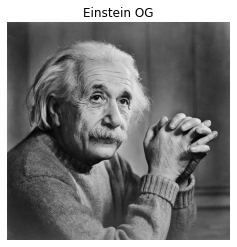

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('media/einstein.jpg')
plt.figure(),plt.axis("off"),plt.title("Einstein OG"),plt.imshow(img)
plt.show()

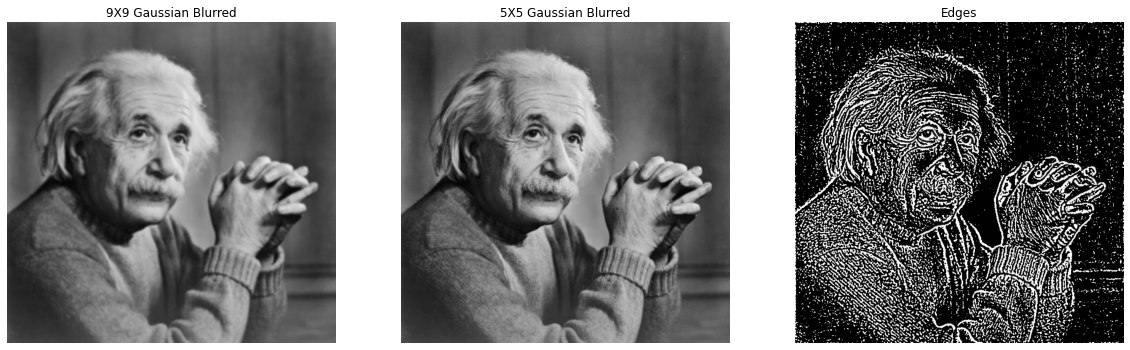

In [ ]:
img1=cv2.GaussianBlur(img,(9,9),0)
img2=cv2.GaussianBlur(img,(5,5),0)

plt.figure(figsize=(20,12))
plt.subplot(131),plt.imshow(img1),plt.axis('off'),plt.title("9X9 Gaussian Blurred")
plt.subplot(132),plt.imshow(img2),plt.axis('off'),plt.title("5X5 Gaussian Blurred")
plt.subplot(133),plt.imshow(img1-img2),plt.axis('off'),plt.title("Edges")
plt.show()

# Question 2

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

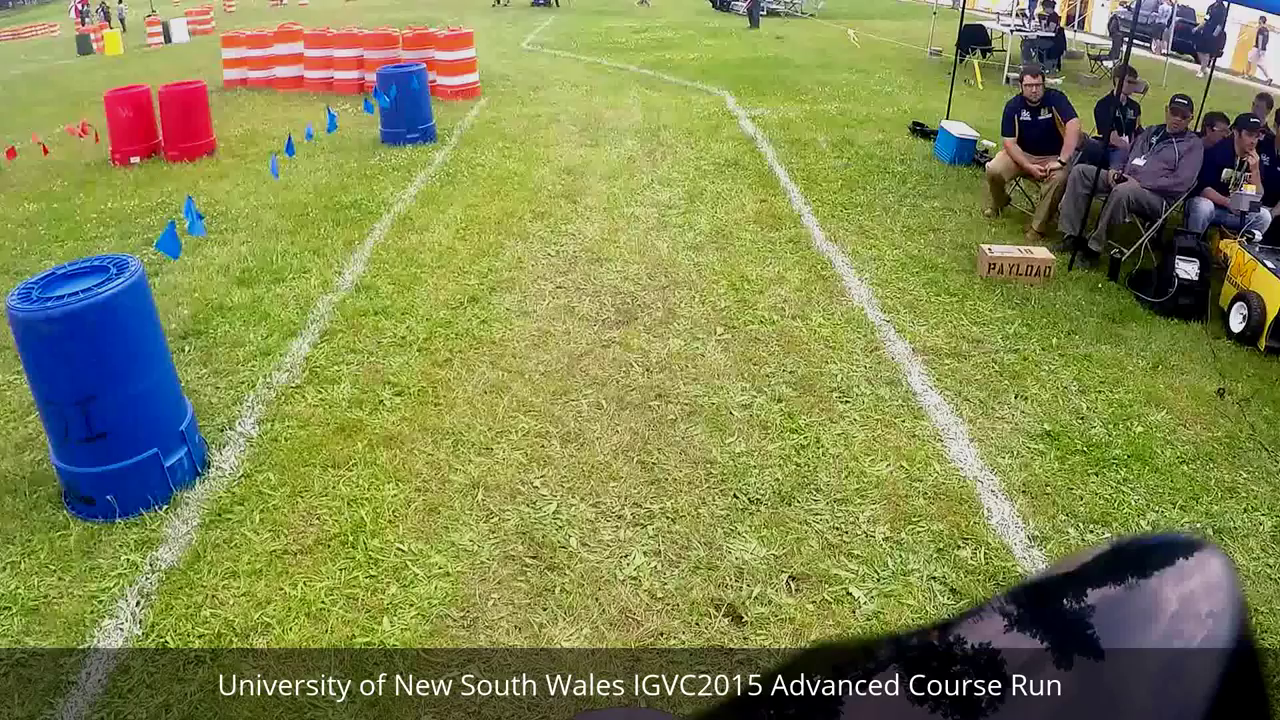

error: ignored

In [9]:
barrel=cv2.imread("PH20B012/barrel_ref.png")
barrel_hsv=cv2.cvtColor(barrel,cv2.COLOR_BGR2HSV)

#calculate and normalize histogram
hist=cv2.calcHist([barrel_hsv],[0,1,2],None,[256,256,256],[0,256,0,256,0,256])
cv2.normalize(hist,hist,0,255,cv2.NORM_MINMAX)
  
video=cv2.VideoCapture('PH20B012/Barrel_video.mp4')

while (True):
  
  ret,frame=video.read()
  frame_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

  res=cv2.calcBackProject([frame_hsv],[0,1,2],hist,[0,256,0,256,0,256],1)   #res is the matrix obtained after back projection
  
  #convolving res with circular disc
  disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
  cv2.filter2D(res, -1, disc, res)

  ret,thresh=cv2.threshold(res,100,255,cv2.THRESH_BINARY)
  final = cv2.merge((thresh,thresh,thresh))
  result = cv2.bitwise_or(frame, final)

  cv2_imshow(result)

  if cv2.waitKey(100) & 0xFF == ord('q'):
    break

  video.release()
  cv2.destroyAllWindows()